In [1]:
import numpy as np
import cv2
from ex1_utils import gaussderiv, gausssmooth, show_flow
import matplotlib.pyplot as plt

### Lucas Kanade

In [2]:
def uniform_kernel(N):
    ker = np.ones((N,N))
    return ker

In [ ]:
def lucaskanade(im1, im2, N):
    """Simple non-pyramid LK optical flow estimation"""
    
    kernel = uniform_kernel(N)
    
    sigma = im1.shape[0] / 200
    sigma = .6
    im2 = gausssmooth(im2, 1)
    im1 = gausssmooth(im1, 1)

    dx_im1, dy_im1 = gaussderiv(im1, sigma)
    dx_im2, dy_im2 = gaussderiv(im2, sigma)

    # Get average derivatives
    I_x = (dx_im1 + dx_im2) / 2
    I_y = (dy_im1 + dy_im2) / 2
    I_t = im2 - im1

    I_xx = I_x * I_x
    I_yy = I_y * I_y
    I_xy = I_x * I_y
    I_xt = I_x * I_t
    I_yt = I_y * I_t
    
    eps = 1e-10
    
    Det = (cv2.filter2D(I_xx, -1, kernel) * cv2.filter2D(I_yy, -1, kernel)) - (cv2.filter2D(I_xy, -1, kernel)**2)
    Det += eps

    u = - (
        cv2.filter2D(I_yy, -1, kernel) *
        cv2.filter2D(I_xt, -1, kernel)
        -
        cv2.filter2D(I_xy, -1, kernel) *
        cv2.filter2D(I_yt, -1, kernel)
    ) / Det 
    
    v = - (
        cv2.filter2D(I_xx, -1, kernel) *
        cv2.filter2D(I_yt, -1, kernel)
        -
        cv2.filter2D(I_xy, -1, kernel) *
        cv2.filter2D(I_xt, -1, kernel)
    ) / Det
    
    return u, v

### Horn-Schunck

In [4]:
def laplacian():
    return np.array([[0, .25, 0], [.25, 0, .25], [0, .25, 0]])

In [ ]:
def hornschunck(im1, im2, n_iters, lmbd):
    
    sigma = im1.shape[0] / 200
    print(sigma)
    
    im1 = gausssmooth(im1, sigma)
    im2 = gausssmooth(im2, sigma)

    dx_im1, dy_im1 = gaussderiv(im1, sigma)
    dx_im2, dy_im2 = gaussderiv(im2, sigma)

    # Get average derivatives
    I_x = (dx_im1 + dx_im2) / 2
    I_y = (dy_im1 + dy_im2) / 2
    I_t = im2 - im1

    lap = laplacian()
    u = np.zeros_like(im1)
    v = np.zeros_like(im1)
    
    eps = 1e-10
    
    for _ in range(n_iters):
        ua = cv2.filter2D(u, -1, lap)
        va = cv2.filter2D(v, -1, lap)
        
        P = I_x * ua + I_y * va + I_t
        D = lmbd + (I_x * I_x) + (I_y * I_y) + eps
        
        u = ua - I_x * (P / D)
        v = va - I_y * (P / D)
        
    return ua, va

## Testing (Req)

1.0


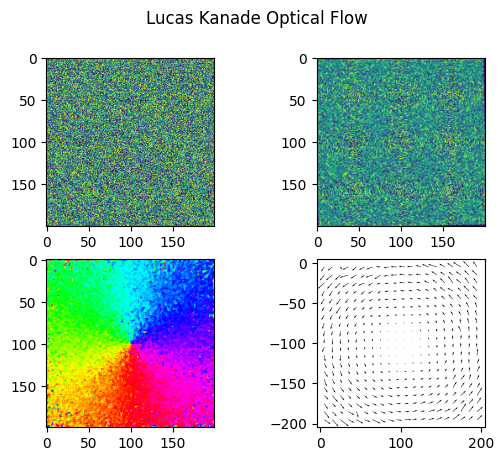

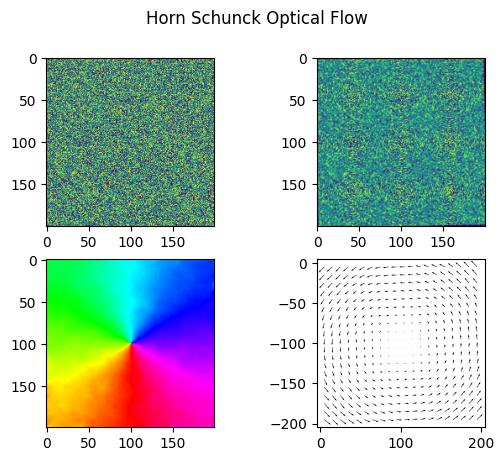

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ex1_utils import rotate_image, show_flow

im1=np.random.rand(200, 200).astype(np.float32)
im2=im1.copy()
im2=rotate_image(im2, 1)


U_lk, V_lk=lucaskanade(im1, im2, 3)
U_hs, V_hs=hornschunck(im1, im2, 1000, 0.5)

fig1, ((ax1_11, ax1_12), (ax1_21, ax1_22)) =plt.subplots(2, 2)

ax1_11.imshow(im1)
ax1_12.imshow(im2)

show_flow(U_lk, V_lk, ax1_21, type='angle')
show_flow(U_lk, V_lk, ax1_22, type='field' , set_aspect=True)

fig1.suptitle('Lucas Kanade Optical Flow')
fig2, ((ax2_11, ax2_12), (ax2_21, ax2_22)) =plt.subplots(2, 2)

ax2_11.imshow(im1)
ax2_12.imshow(im2)

show_flow(U_hs, V_hs, ax2_21, type='angle')
show_flow(U_hs, V_hs, ax2_22, type='field' , set_aspect=True)
fig2.suptitle('Horn Schunck Optical Flow')
plt.show()

### Test on other images (3 pairs)

2.125


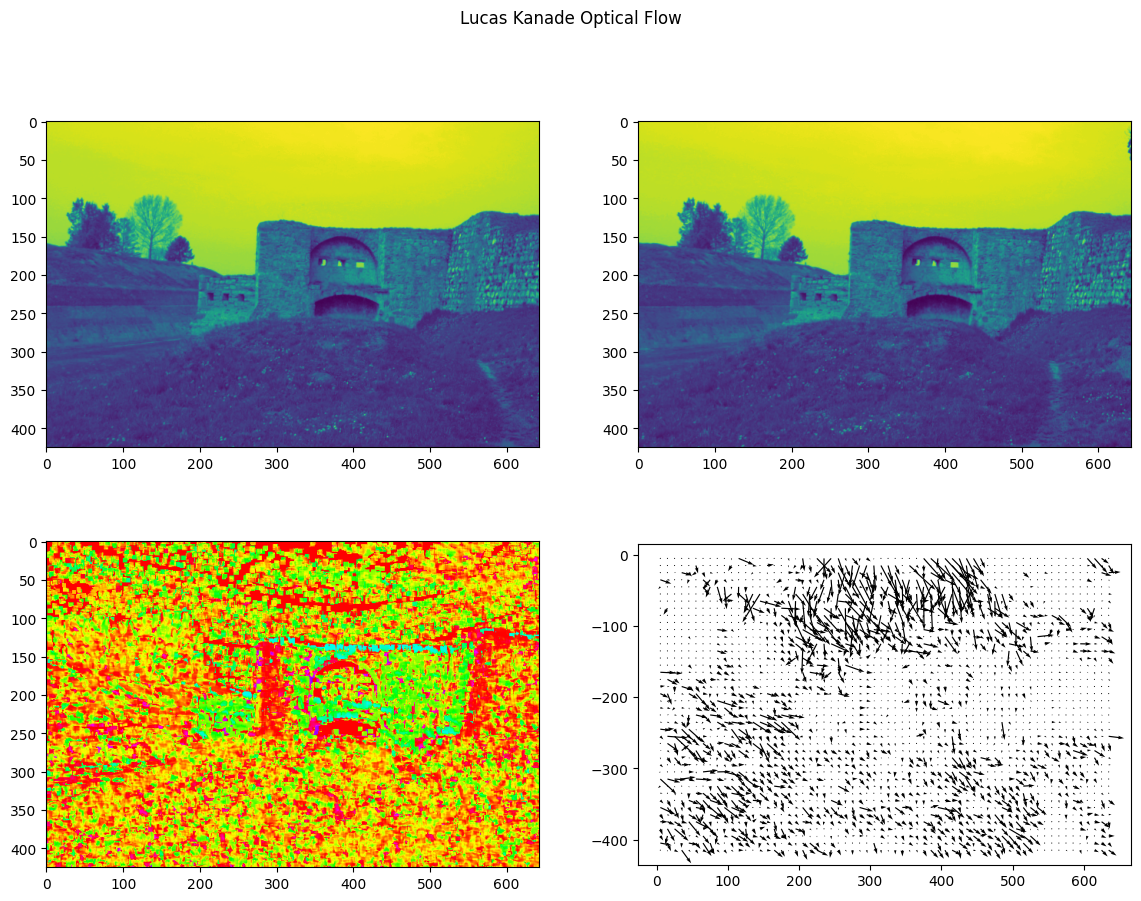

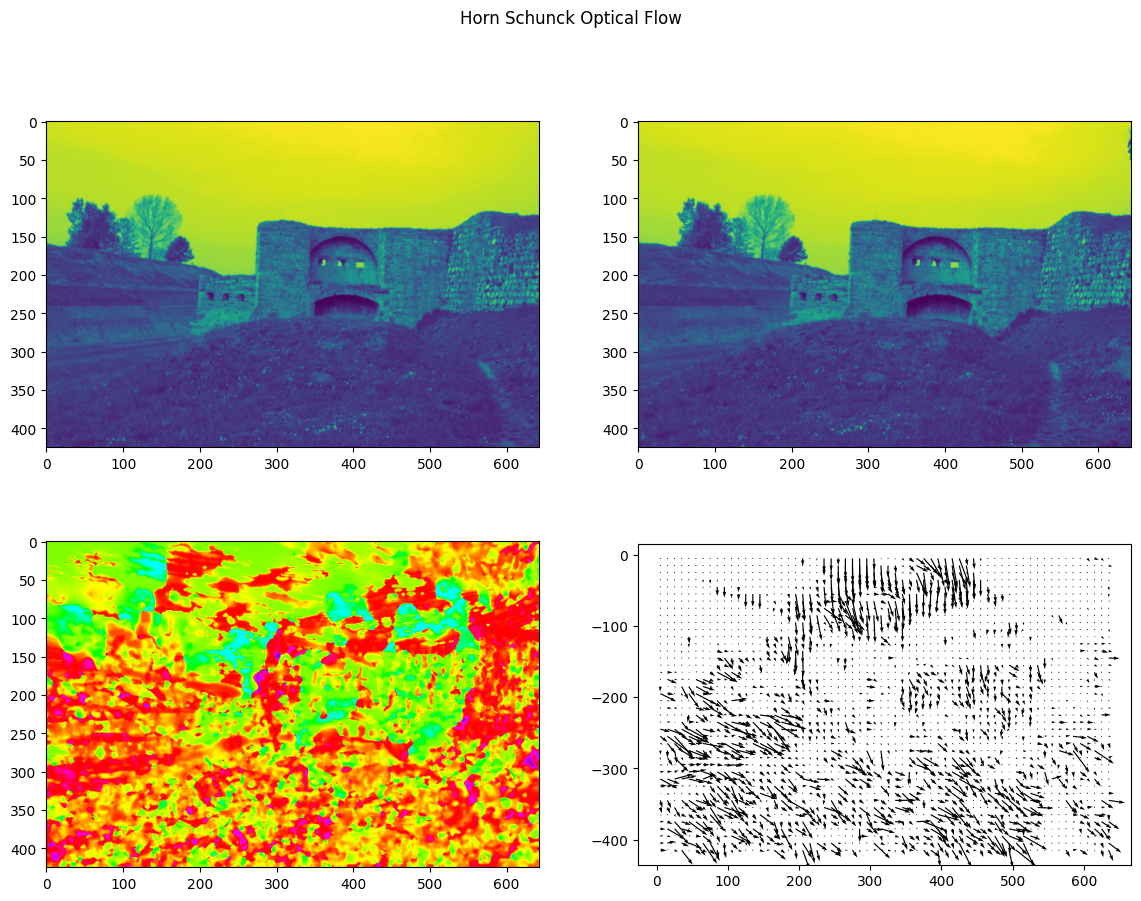

2.08


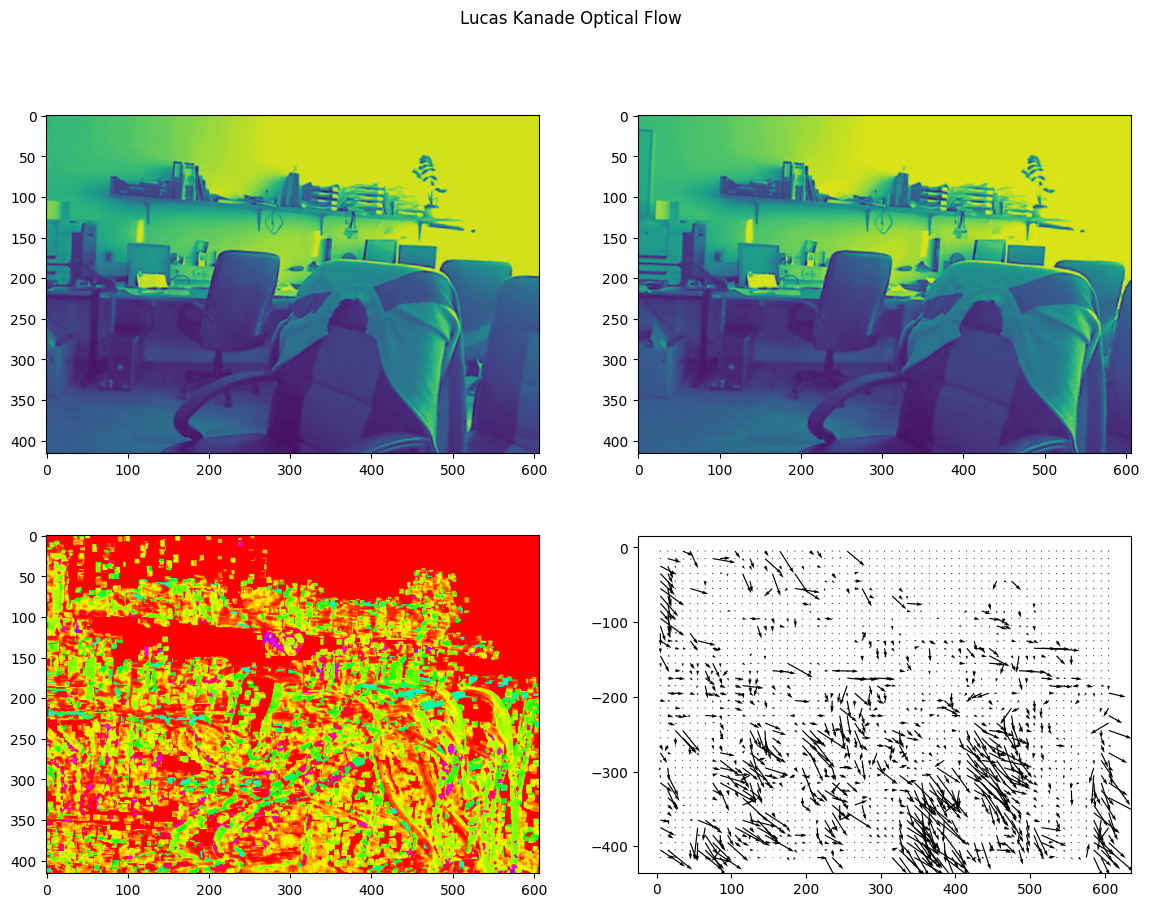

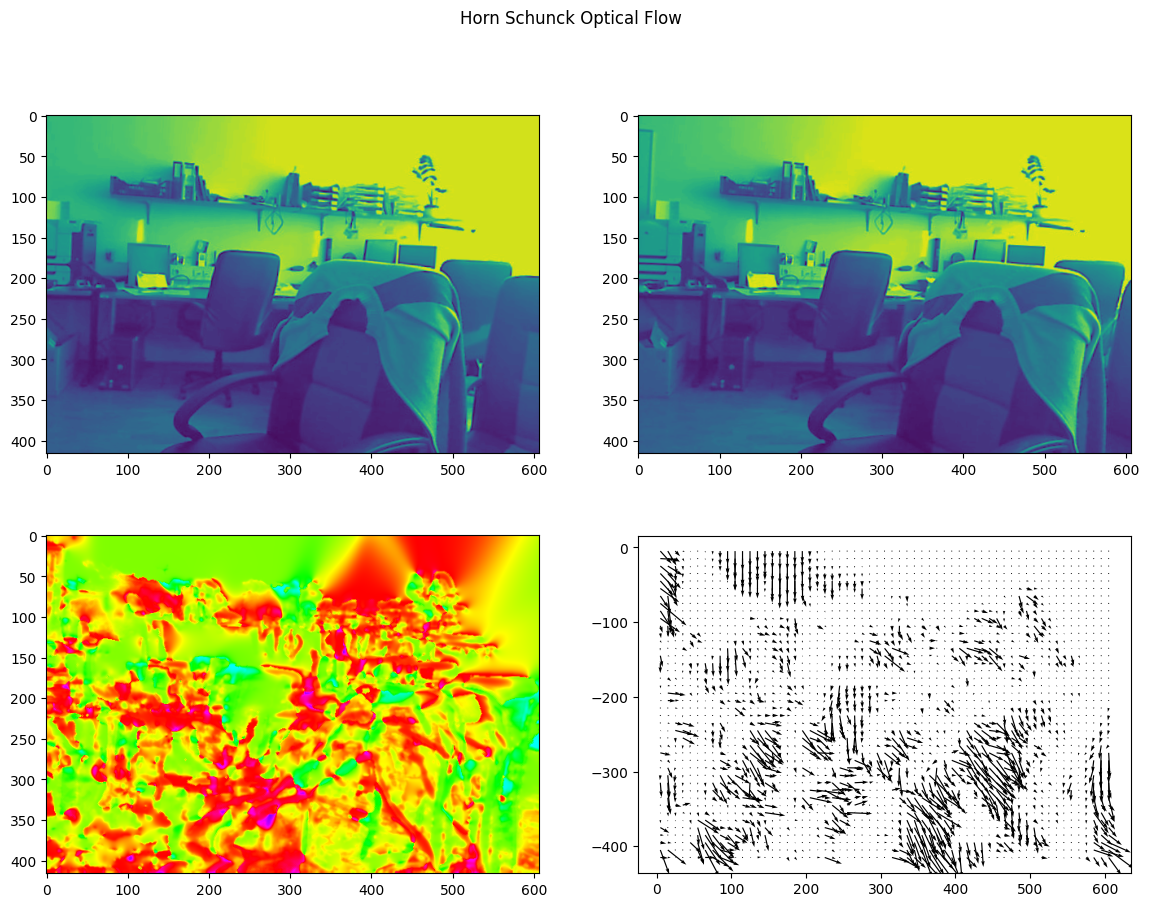

2.08


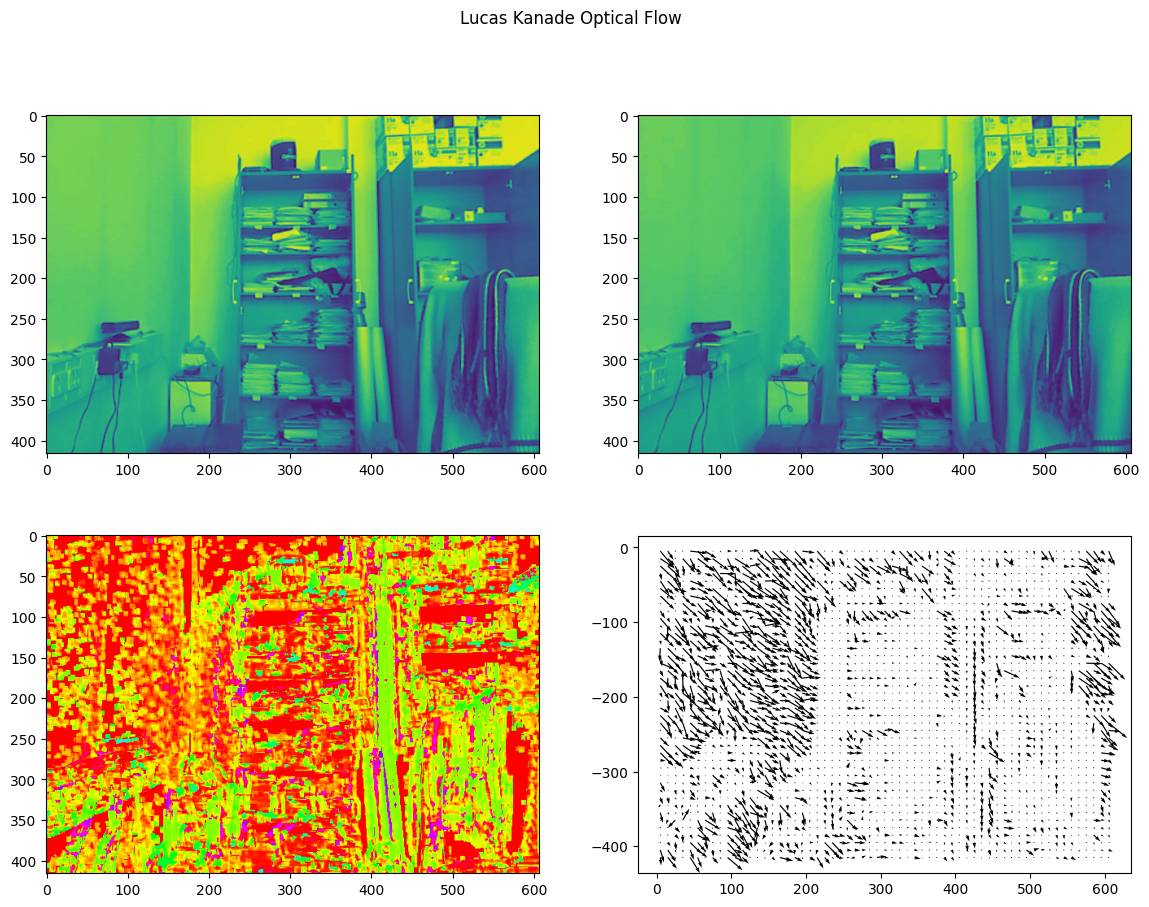

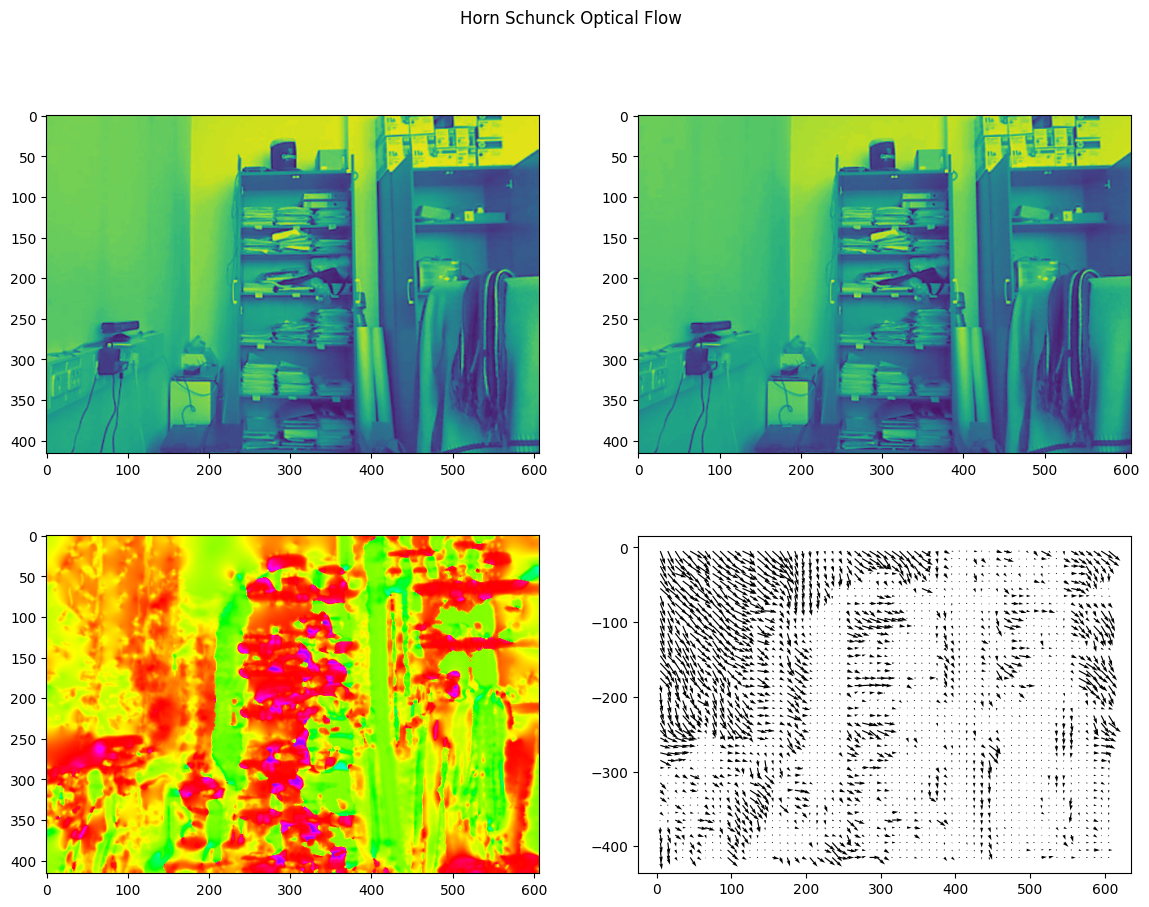

In [7]:
pairs = [("disparity/cporta_left.png", "disparity/cporta_right.png"), ("disparity/office_left.png", "disparity/office_right.png"), ("disparity/office2_left.png", "disparity/office2_right.png")]

for p1, p2 in pairs:
    im1 = cv2.imread(p1)
    im2 = cv2.imread(p2)

    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


    U_lk, V_lk = lucaskanade(im1, im2, 6)
    U_hs, V_hs = hornschunck(im1, im2, n_iters=1000, lmbd=.5)
    
    fig1, ((ax1_11, ax1_12), (ax1_21, ax1_22)) = plt.subplots(2, 2, figsize=(14, 10))

    ax1_11.imshow(im1)
    ax1_12.imshow(im2)

    show_flow(U_lk, V_lk, ax1_21, type='angle')
    show_flow(U_lk, V_lk, ax1_22, type='field' , set_aspect=True)

    fig1.suptitle('Lucas Kanade Optical Flow')
    fig2, ((ax2_11, ax2_12), (ax2_21, ax2_22)) = plt.subplots(2, 2, figsize=(14, 10))

    ax2_11.imshow(im1)
    ax2_12.imshow(im2)

    show_flow(U_hs, V_hs, ax2_21, type='angle')
    show_flow(U_hs, V_hs, ax2_22, type='field' , set_aspect=True)
    fig2.suptitle('Horn Schunck Optical Flow')
    plt.show()
        